In [ ]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 

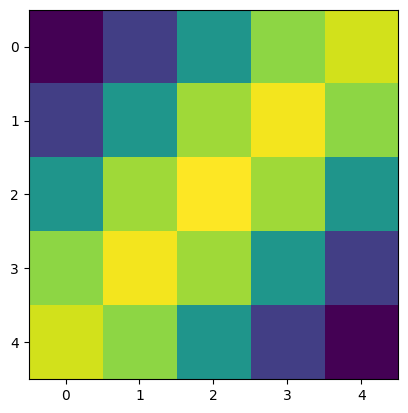

In [ ]:
#Gabor filter, multiple filters in one. Generate filter bank. 
"""
For image processing and computer vision, Gabor filters are generally 
used in texture analysis, edge detection, feature extraction, etc. 
Gabor filters are special classes of bandpass filters, i.e., they allow a certain 
‘band’ of frequencies and reject the others.
ksize Size of the filter returned.
sigma Standard deviation of the gaussian envelope.
theta Orientation of the normal to the parallel stripes of a Gabor function.
lambda Wavelength of the sinusoidal factor.
gamma Spatial aspect ratio.
psi Phase offset.
ktype Type of filter coefficients. It can be CV_32F or CV_64F.
indicates the type and range of values that each pixel in the Gabor kernel can hold.
Basically float32 or float64
#Gabor filter, multiple filters in one. Generate fiter bank. 
"""

ksize = 5 # should be adapted to the size of the features in the image 
sigma = 3
theta = 1*np.pi/4
lamda = 1*np.pi/4
gamma = 0.5
phi = 0
def filter(ksize, sigma , theta , lamda , gamma , phi):
  kernel = cv.getGaborKernel((ksize,ksize), sigma , theta , lamda , gamma , phi , ktype=cv.CV_32F) # float 32 ; type of kernel's values 
  plt.imshow(kernel)
filter(ksize, sigma , theta , lamda , gamma , phi)
# theta = 45° => the filter is rotated 45°

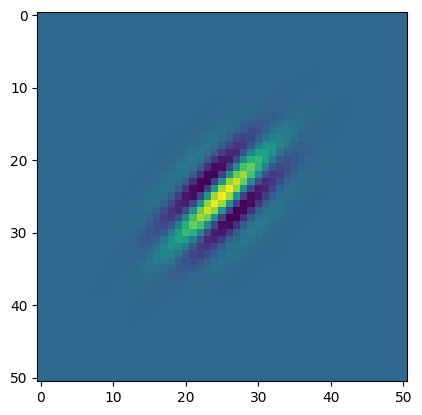

In [ ]:
ksize = 50 
filter(ksize, sigma , theta , lamda , gamma , phi)

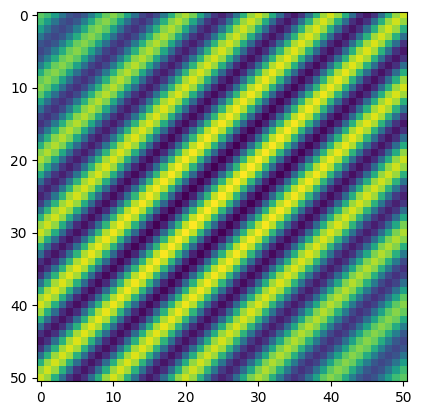

In [ ]:
sigma= 30 
filter(ksize, sigma , theta , lamda , gamma , phi)

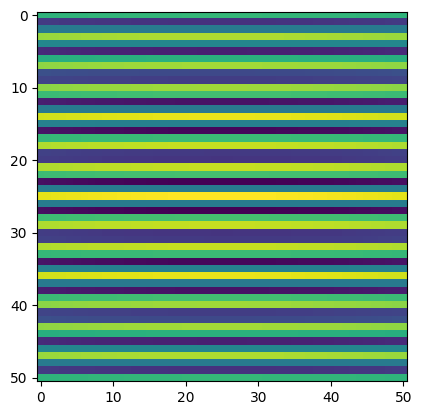

In [ ]:
# when we generate features gor our ML we sweep through these parameteres space => create a filter bank 
theta = 1*np.pi/2
filter(ksize, sigma , theta , lamda , gamma , phi)
# => horizontal filter : pass horizontal features 
# vertical filter : 1*np.pi

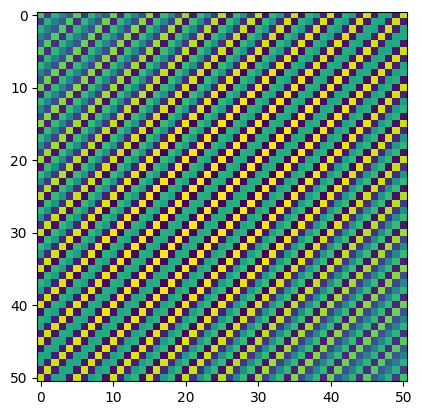

In [ ]:
theta = 1*np.pi/4
lamda = 1*np.pi/2 # => wavelength
filter(ksize, sigma , theta , lamda , gamma , phi)

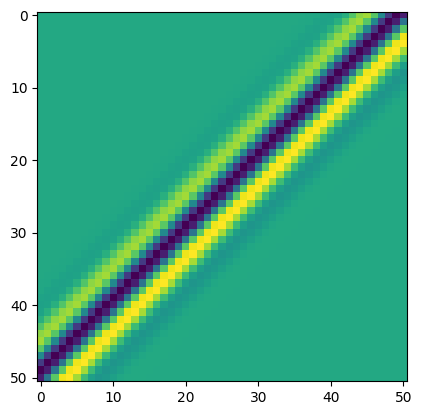

In [ ]:
ksize = 50
sigma = 3
theta = 1*np.pi/4
lamda = 1*np.pi/4
gamma = 0.01 # elongated kernel 
phi = 10 # shift
filter(ksize, sigma , theta , lamda , gamma , phi)

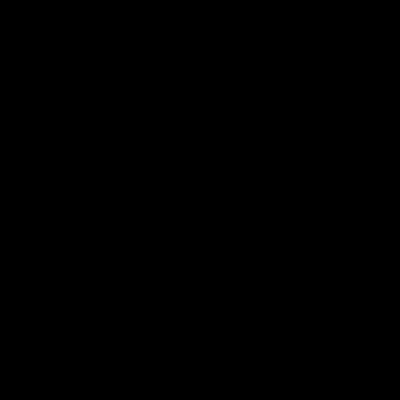

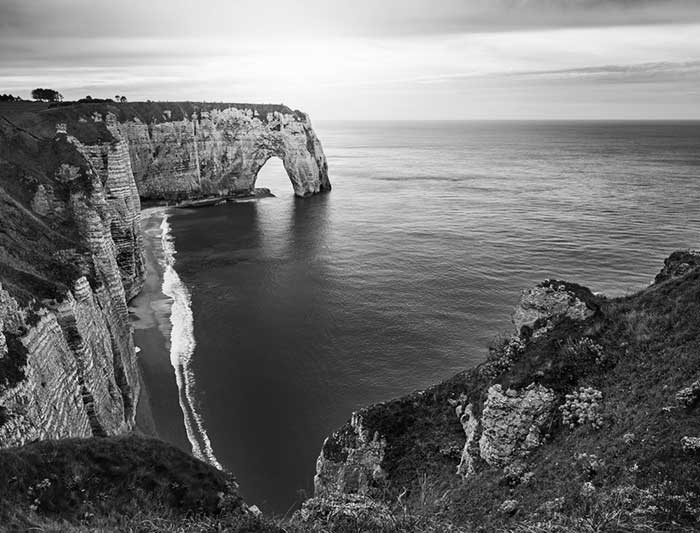

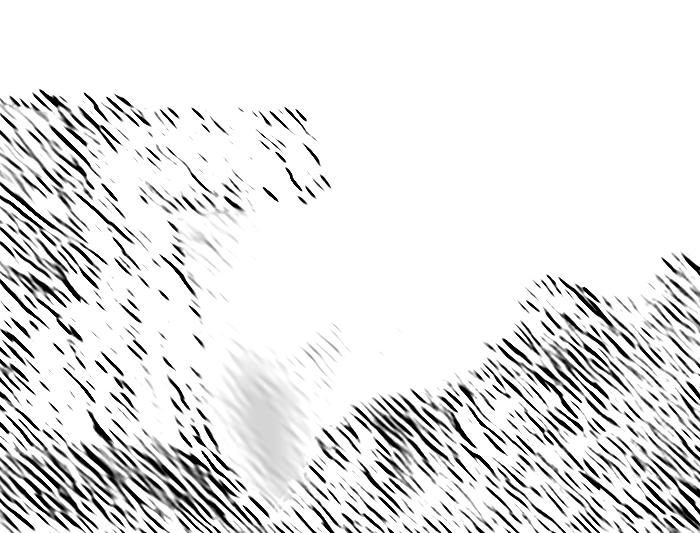

In [ ]:

from google.colab.patches import cv2_imshow
ksize = 20  #Use size that makes sense to the image and fetaure size. Large may not be good. 
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 3 #Large sigma on small features will fully miss the features. 
theta = 3*np.pi/4  #/4 shows horizontal 1/4 shows other horizontal. Try other contributions
lamda = 1*np.pi /4  #1/4 works best for angled. 
gamma=0.4  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0  #Phase offset. I leave it to 0.

kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv.CV_32F)
cv2_imshow(kernel)

img = cv.imread('test_image2.jpg')

img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
fimg = cv.filter2D(img, cv.CV_8UC3, kernel)

kernel_resized = cv.resize(kernel, (400, 400))                    # Resize image to view the kernel 
cv2_imshow(kernel_resized)
cv2_imshow( img)
cv2_imshow( fimg)

cv.waitKey(5000)
cv.destroyAllWindows()

### Create Gaabor feature banks for machine learning 
generate various features using the filter and feed it to an ML algorithm
bank : different responses of the filter on an image 

In [ ]:
import pandas as pd 
import os
import csv

df = pd.DataFrame()
img2 = img.reshape(-1)
df['Original Pixels'] = img2

num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []  #Create empty list to hold all kernels that we will generate in a loop

for theta in range(2):   # Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  # Sigma with values of 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   # Range of wavelengths 
            for gamma in (0.05, 0.5): # Gamma values of 0.05 and 0.5
                 gabor_label = 'Gabor' + str(num)
                 kernel = cv.getGaborKernel((5, 5), sigma, theta, lamda, gamma, phi, ktype=cv.CV_32F)
                 kernels.append(kernel)
                 fimg = cv.filter2D(img, cv.CV_8UC3, kernel) 
                 filtered_img = img.reshape(-1)
                 df[gabor_label] = filtered_img
                 num  += 1
print(df.head())
df.to_csv('Gabor.csv')

   Original Pixels  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0              134     134     134     134     134     134     134     134   
1              134     134     134     134     134     134     134     134   
2              135     135     135     135     135     135     135     135   
3              135     135     135     135     135     135     135     135   
4              136     136     136     136     136     136     136     136   

   Gabor8  Gabor9  ...  Gabor23  Gabor24  Gabor25  Gabor26  Gabor27  Gabor28  \
0     134     134  ...      134      134      134      134      134      134   
1     134     134  ...      134      134      134      134      134      134   
2     135     135  ...      135      135      135      135      135      135   
3     135     135  ...      135      135      135      135      135      135   
4     136     136  ...      136      136      136      136      136      136   

   Gabor29  Gabor30  Gabor31  Gabor32  
0      134

### Histogram Equalization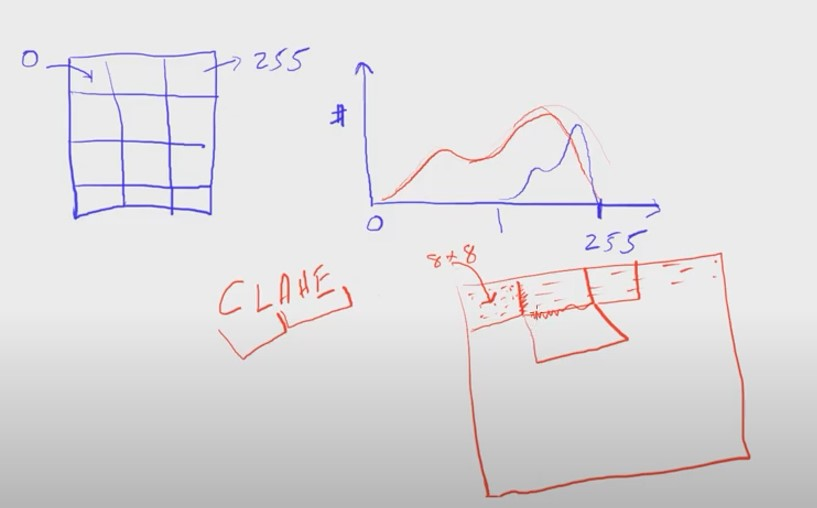

In [ ]:
import cv2 as cv
from skimage import io 
from matplotlib import pyplot as plt 
from google.colab.patches import cv2_imshow

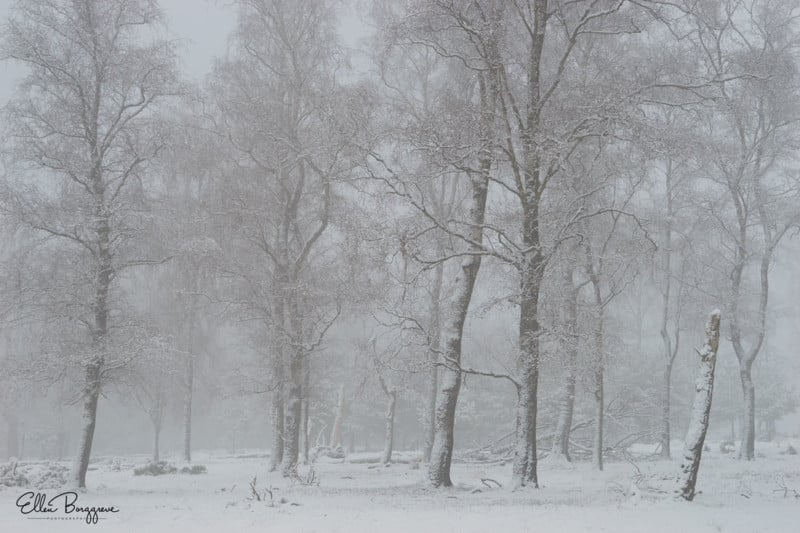

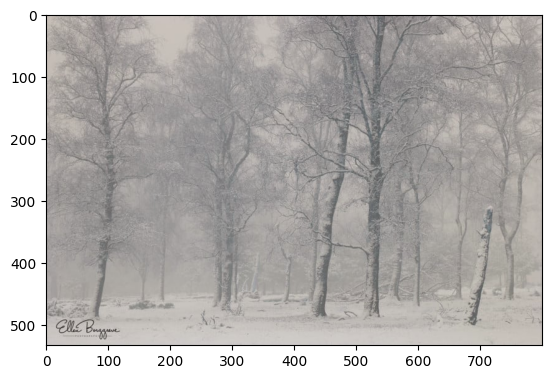

In [ ]:
img = cv.imread("test_image3.jpg",1)
plt.imshow(img)
cv2_imshow(img)

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 6.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00,
        2.0000e+00, 9.0000e+00, 3.0000e+00, 4.0000e+00, 7.0000e+00,
        9.0000e+00, 3.0000e+00, 1.8000e+01, 1.2000e+01, 1.4000e+01,
        2.2000e+01, 1.7000e+01, 3.3000e+01, 1.7000e+01, 2.6000e+01,
        2.3000e+01, 3.4000e+01, 3.2000e+01, 6.4000e+01, 9.9000e+01,
        2.9600e+02, 4.6300e+02, 5.3500e+02, 1.1410e+03, 8.6600e+02,
        1.5060e+03, 1.0740e+03, 1.7010e+03, 1.3420e+03, 2.1930e+03,
        2.6190e+03, 2.0570e+03, 3.7540e+03, 2.9930e+03, 5.5870e+03,
        4.8150e+03, 8.6470e+03, 7.1580e+03, 1.3341e+04, 1.2381e+04,
        2.0357e+04, 2.4439e+04, 1.8175e+04, 3.3258e+04, 2.0320e+04,
        3.2797e+04, 2.0319e+04, 2.8332e+04, 1.7210e+04, 2.4558e+04,
        1.8685e+04, 8.9150e+03, 1.2724e+04, 8.06

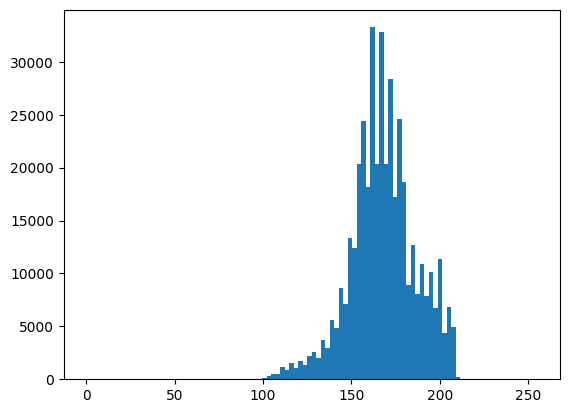

In [ ]:
# convert the image to a different space where we can play with lumunosity lab color space 
lab_img = cv.cvtColor(img,cv.COLOR_BGR2LAB)
l , a , b = cv.split(lab_img)
plt.hist(l.flat , bins=100 ,range= (0,255))

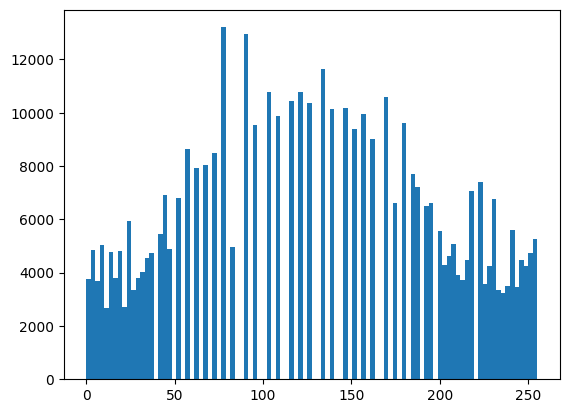

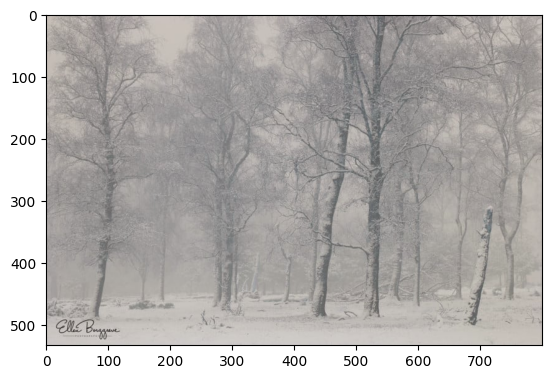

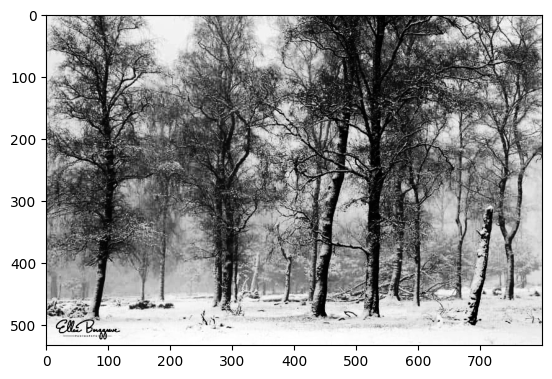

In [ ]:
#  Histogram equalization
equ = cv.equalizeHist(l)
plt.hist(equ.flat , bins=100 ,range= (0,255))
plt.show()
plt.imshow(img)
plt.show()
plt.imshow(equ , cmap='gray')
plt.show()


In [ ]:
updated_lab_img1 = cv.merge((equ,a,b))
updated_lab_img2=cv.cvtColor(img,cv.COLOR_LAB2BGR)
hist_eq_img = cv.cvtColor(updated_lab_img1,cv.COLOR_LAB2BGR)
plt.imshow(updated_lab_img1)
plt.show()
cv2_imshow(updated_lab_img1)
plt.imshow(updated_lab_img2)
plt.show()
cv2_imshow(updated_lab_img2)

Output hidden; open in https://colab.research.google.com to view.

### CLAHE :

In [ ]:
import os 
SOURCE_DIR = "/content/drive/MyDrive/drive pfa/dataset"
IMG_ENTREE = []
IMG_SORTIE = []
i=0
for file_name in os.listdir(SOURCE_DIR):
    i=i+1
    file_path=os.path.join(SOURCE_DIR,file_name)
    img = cv.imread(file_path,1)
    IMG_ENTREE.append(img)
    lab_img= cv.cvtColor(img, cv.COLOR_BGR2LAB)
    l,a,b=cv.split(lab_img)
    # apply CLAHE to L channel 

    clahe = cv.createCLAHE(clipLimit=3.0 , tileGridSize=(8,8))
    clahe_img = clahe.apply(l)

    plt.hist(clahe_img,bins=100,range=(0,255))
    plt.show()
    # combine the CLAHE enhanced L-channel back with a , b channel 
    updated_lab_img3=cv.merge((clahe_img,a,b))
    # convert LAB image back to color (RGB)
    CLAHE_img=cv.cvtColor(updated_lab_img3,cv.COLOR_LAB2BGR)
    cv2_imshow(img)

    equ = cv.equalizeHist(l)
    updated_lab_img4 = cv.merge((equ,a,b))
    hist_eq_img = cv.cvtColor(updated_lab_img4,cv.COLOR_LAB2BGR)
    cv2_imshow(hist_eq_img)

    cv2_imshow(CLAHE_img)
    IMG_SORTIE.append(CLAHE_img)
    path=f"/content/drive/MyDrive/drive pfa/CLAHE_dataset/sortie{i}.jpg"
    cv.imwrite(path,CLAHE_img)

    cv.waitKey(0)
    cv.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

### GAN :

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 320, 320, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_72 (Conv2D)             (None, 320, 320, 16  448         ['input_10[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_12 (MaxPooling2D  (None, 320, 320, 16  0          ['conv2d_72[0][0]']              
 )                              )                                                          

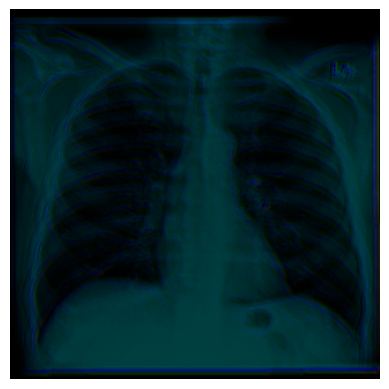

In [ ]:
# import tensorflow as tf
# import numpy as np
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate

# def inception_block(x, filters):
#     branch1 = Conv2D(filters[0], (3, 3), padding='same', activation='relu')(x)

#     branch2 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(branch1)
#     branch3 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(branch1)

#     branch4 = Conv2D(filters[3], (7, 7), padding='same', activation='relu')(branch1)

#     branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(branch1) 
#     branch5 = Conv2D(filters[4], (1, 1), padding='same', activation='relu')(branch_pool)

#     concatenation = Concatenate(axis=-1)([branch2, branch3, branch4, branch5])
#     output = Conv2D(filters[5], (3, 3), padding='same', activation='relu')(concatenation)

#     return output
# img = "/content/sample_data/view1_frontal 2.jpg"
# #img.resize = (225, 225, 3)
# image = tf.io.read_file(img)
# image = tf.image.decode_image(image, channels=3)  # Set the number of channels based on your image format (e.g., 1 for grayscale, 3 for RGB)
# image = tf.convert_to_tensor(image)
# input_tensor = tf.keras.Input(shape=image.shape)

# output_tensor = inception_block(input_tensor, [16, 32, 32, 32, 32, 3])

# model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)
# model.summary()
# #numpy_array =np.ndarray(output_tensor)

# print(input_tensor)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Concatenate

def inception_block(x, filters):
    branch1 = Conv2D(filters[0], (3, 3), padding='same', activation='relu')(x)

    branch2 = Conv2D(filters[1], (3, 3), padding='same', activation='relu')(branch1)
    branch3 = Conv2D(filters[2], (5, 5), padding='same', activation='relu')(branch1)

    branch4 = Conv2D(filters[3], (7, 7), padding='same', activation='relu')(branch1)

    branch_pool = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(branch1) 
    branch5 = Conv2D(filters[4], (1, 1), padding='same', activation='relu')(branch_pool)

    concatenation = Concatenate(axis=-1)([branch2, branch3, branch4, branch5])
    output = Conv2D(filters[5], (3, 3), padding='same', activation='relu')(concatenation)

    return output

img_path = "/content/sample_data/view1_frontal 2.jpg"
image = tf.io.read_file(img_path)
image = tf.image.decode_image(image, channels=3)
image = tf.expand_dims(image, axis=0)  # Add a batch dimension
image = tf.cast(image, tf.float32)  # Convert to float32

input_tensor = tf.keras.Input(shape=image.shape[1:])  # Define input shape excluding the batch dimension
output_tensor = inception_block(input_tensor, [16, 32, 32, 32, 32, 3])

model = tf.keras.Model(inputs=input_tensor, outputs=output_tensor)
model.summary()

numpy_array = model.predict(image)  # Run the model on the input image to obtain the output tensor
plt.imshow(numpy_array[0].astype(np.uint8))  # Display the image
plt.axis('off')  # Turn off axis ticks
plt.show()


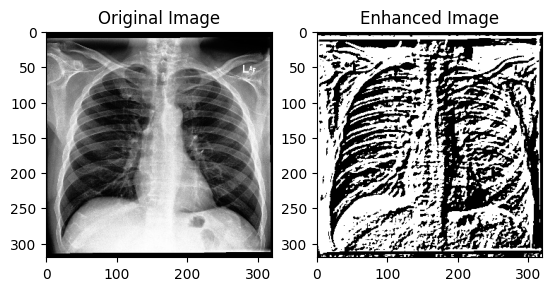

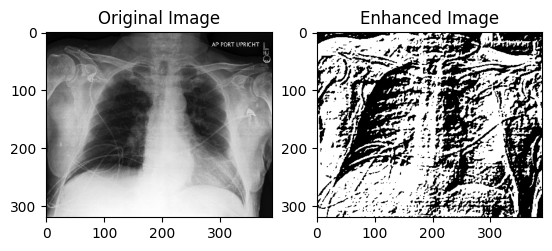

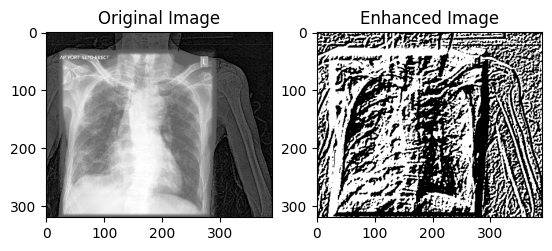

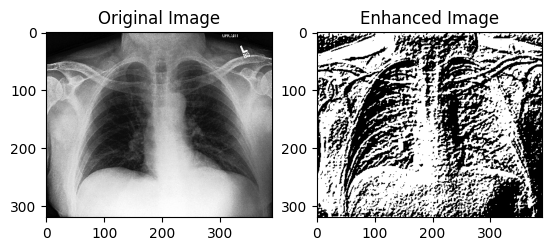

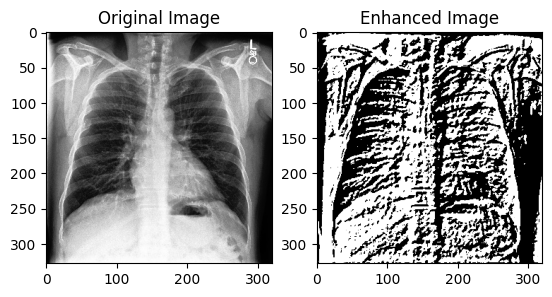

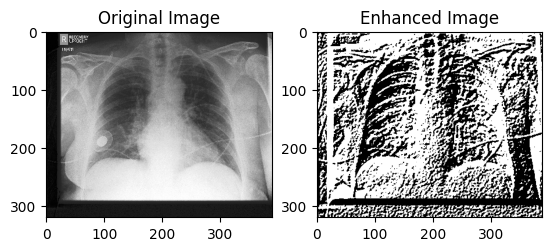

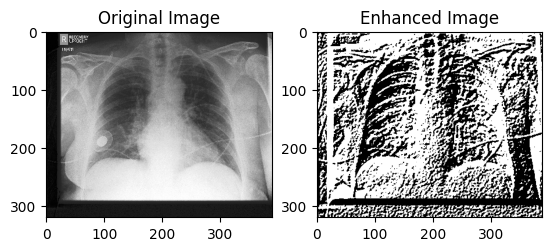

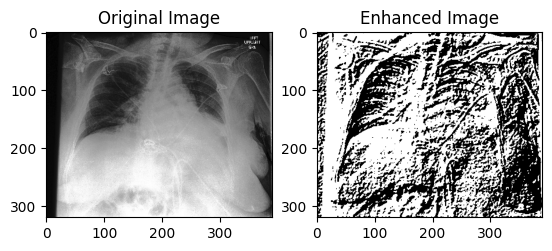

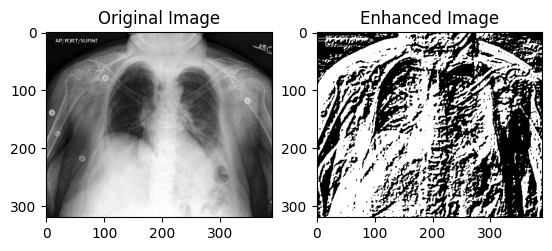

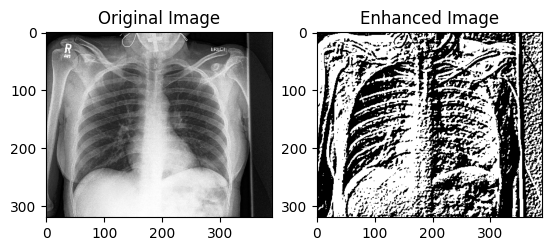

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os 


ksize = 5 # should be adapted to the size of the features in the image 
sigma = 3
theta = 1*np.pi/4
lamda = 1*np.pi/4
gamma = 0.5
phi = 0

kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lambda_, gamma)
kernel /= np.max(kernel)

SOURCE_DIR = "/content/drive/MyDrive/drive pfa/dataset"
IMG_INPUT = []
IMG_OUTPUT = []
i=0
for file_name in os.listdir(SOURCE_DIR):
    i=i+1
    file_path=os.path.join(SOURCE_DIR,file_name)
    image = cv.imread(file_path,1)
    IMG_INPUT.append(image)
    filtered_image = cv.filter2D(image, cv.CV_64F, kernel)
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title('Enhanced Image')
    IMG_OUTPUT.append(filtered_image)
    path=f"/content/drive/MyDrive/drive pfa/GABOR_dataset/sortie{i}.jpg"
    cv.imwrite(path,filtered_image)
    cv.waitKey(0)
    cv.destroyAllWindows()
    plt.show()